In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image

* Pandas: 컴퓨터 프로그래밍에서 pandas는 데이터 조작 및 분석을 위해 Python 프로그래밍 언어로 작성된 소프트웨어 라이브러리입니다. 특히 숫자 테이블과 시계열을 조작하기위한 데이터 구조와 연산을 제공합니다.
    * 구조화된 데이터 처리
        * 구조화된 데이터: CSV 파일, 엑셀 스프레드 시트, 데이터베이스 테이블 등 테이블에 저장된 데이터
        * 구조화되지 않은 데이터: 자유형식의 텍스트, 이미지, 사운드, 비디오 등
    * [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
    * [Pandas Cheat Sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)
    * 10 Minute to Pandas
        * [한글 번역 1](https://dataitgirls2.github.io/10minutes2pandas)  
        * [한글 번역 2](https://teddylee777.github.io/pandas/10minutes-to-pandas-%EB%B6%80%EB%8F%99%EC%82%B0%EC%8B%A4%EC%A0%9C%EB%8D%B0%EC%9D%B4%ED%84%B0-%ED%99%9C%EC%9A%A9%ED%95%98%EA%B8%B0)
        * [원문](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
    * [Extension](https://junpyopark.github.io/Jupyter_Extension/)
* NumPy: NumPy는 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리 할 수 있도록 지원하는 파이썬의 라이브러리이다. NumPy는 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공한다.
    * [Numpy Manual](https://numpy.org/doc/stable/)
* Matplotlib: Matplotlib은 파이썬에서 매트랩과 유사한 그래프 표시를 가능케 하는 라이브러리다.
    * [Matplotlib Documentation](https://matplotlib.org/stable/contents.html#)

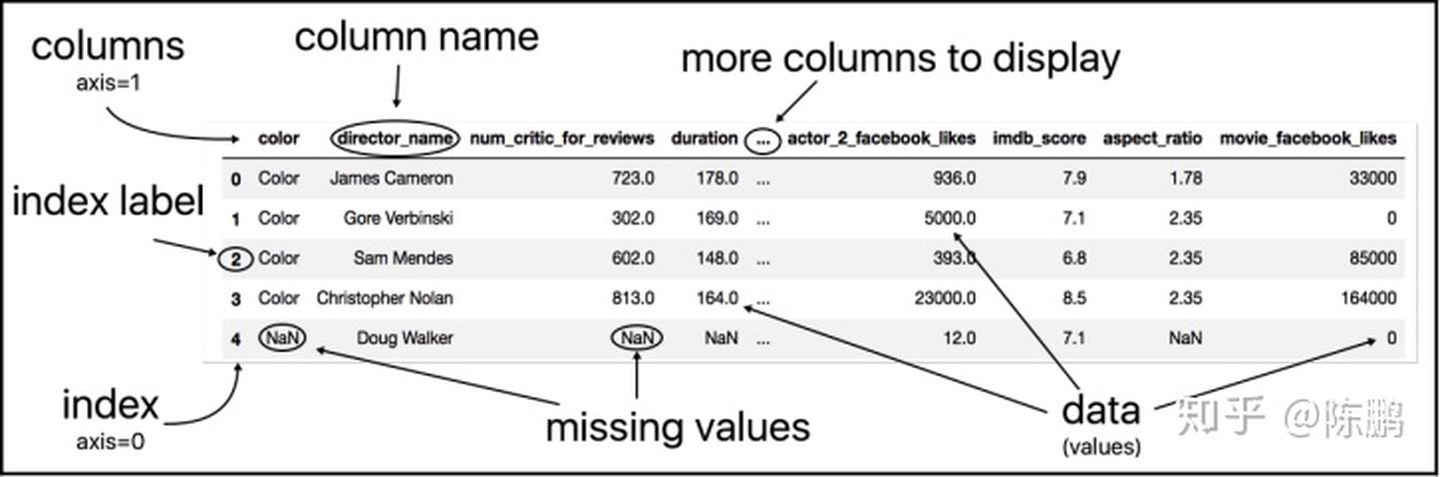

In [2]:
Image("https://pic4.zhimg.com/80/v2-df829dba019228e0d1c517ab1820ccc3_1440w.jpg")
# https://zhuanlan.zhihu.com/p/91686483

# Object creation (객체 생성)

Pandas는 값을 가지고 있는 리스트를 통해 Series를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러올 것입니다.

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

인덱스를 지정하여 Series 생성

In [5]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])

In [6]:
s

a    1.703628
b   -1.709033
c   -0.465728
d   -2.009050
e   -0.137089
dtype: float64

딕셔너리를 통한 Series 생성

In [7]:
d = {"b": 1, "a": 0, "c": 2}

In [8]:
pd.Series(d)

b    1
a    0
c    2
dtype: int64

datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임을 만듭니다.

In [10]:
dates = pd.date_range("20130101", periods=6)

In [11]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [12]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))

In [13]:
df

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-05,-0.580294,0.106257,1.333073,0.758955
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386


Series와 같은 것으로 변환될 수 있는 객체들의 dict로 구성된 데이터프레임을 만듭니다.

In [23]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo"
    }
)

In [24]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


데이터프레임 결과물의 열은 다양한 데이터 타입 (dtypes)으로 구성됩니다.

In [25]:
df2.dtypes # 각 열의 이름과 데이터 형식을 나란히 표시

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

데이터 형식
* 연속형(Continuous): 키, 급여와 같은 일종의 측정값으로, 항상 수치로 나타낼 수 있음. 무한개
* 범주형(Categorical) : 자동차 색상, 휴대폰 종류, 시리얼 브랜드와 같이 유한한 값을 타나냄

In [26]:
df2.dtypes.value_counts() # 각 데이터 형식의 개수 반환

float64           1
float32           1
category          1
datetime64[ns]    1
object            1
int32             1
dtype: int64

# Viewing data (데이터 확인하기)

In [27]:
df

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-05,-0.580294,0.106257,1.333073,0.758955
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386


In [28]:
df.head() # 처음 5줄을 불러옴

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-05,-0.580294,0.106257,1.333073,0.758955


In [29]:
df.head(3) # 처음 3줄을 불러옴

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499


In [30]:
df.tail(3) # 끝에서 마지막 3줄을 불러옴

,A,B,C,D
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-05,-0.580294,0.106257,1.333073,0.758955
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386


인덱스 (index), 열 (column) 그리고 numpy 데이터에 대한 세부 정보를 봅니다.

In [31]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [32]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [33]:
df.values

array([[ 1.63830233,  0.63316762,  0.7207091 , -0.15961248],
       [ 0.49885761,  0.71856713,  1.44682011,  2.65278899],
       [-0.63748319,  0.18710223,  0.13100392, -0.31849941],
       [-2.45368664, -0.37917012, -1.58271467, -0.36782922],
       [-0.58029437,  0.10625664,  1.33307316,  0.75895466],
       [-0.82574254, -2.53160387, -0.51369802,  0.0783859 ]])

In [34]:
df.to_numpy()

array([[ 1.63830233,  0.63316762,  0.7207091 , -0.15961248],
       [ 0.49885761,  0.71856713,  1.44682011,  2.65278899],
       [-0.63748319,  0.18710223,  0.13100392, -0.31849941],
       [-2.45368664, -0.37917012, -1.58271467, -0.36782922],
       [-0.58029437,  0.10625664,  1.33307316,  0.75895466],
       [-0.82574254, -2.53160387, -0.51369802,  0.0783859 ]])

In [35]:
df2.values

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

In [39]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

describe()는 데이터의 대략적인 통계적 정보 요약을 보여줍니다.

In [40]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.393341,-0.210947,0.255866,0.440698
std,1.374783,1.204104,1.164734,1.158997
min,-2.453687,-2.531604,-1.582715,-0.367829
25%,-0.778678,-0.257813,-0.352523,-0.278778
50%,-0.608889,0.146679,0.425857,-0.040613
75%,0.229070,0.521651,1.179982,0.588812
max,1.638302,0.718567,1.446820,2.652789


In [41]:
df.quantile(0.25) # 수치 데이터의 분위수 계산 (하위 25%)

A   -0.778678
B   -0.257813
C   -0.352523
D   -0.278778
Name: 0.25, dtype: float64

In [42]:
df.quantile(
    [0.25, 0.5, 0.75, 0.8, 1]
)

,A,B,C,D
0.25,-0.778678,-0.257813,-0.352523,-0.278778
0.50,-0.608889,0.146679,0.425857,-0.040613
0.75,0.229070,0.521651,1.179982,0.588812
0.80,0.498858,0.633168,1.333073,0.758955
1.00,1.638302,0.718567,1.446820,2.652789


In [43]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [44]:
fruits = {"A": ["apple", "apricot"], "B": ["banana", "banana"], "C": ["cherry", "citron"]}

In [45]:
df_obj = pd.DataFrame(fruits)

In [46]:
df_obj

,A,B,C
0,apple,banana,cherry
1,apricot,banana,citron


In [47]:
df_obj.describe() # 요약 통계 (object)

,A,B,C
count,2,2,2
unique,2,1,2
top,apricot,banana,cherry
freq,1,2,1


데이터를 전치합니다.

In [48]:
df

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-05,-0.580294,0.106257,1.333073,0.758955
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386


In [49]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.638302,0.498858,-0.637483,-2.453687,-0.580294,-0.825743
B,0.633168,0.718567,0.187102,-0.379170,0.106257,-2.531604
C,0.720709,1.446820,0.131004,-1.582715,1.333073,-0.513698
D,-0.159612,2.652789,-0.318499,-0.367829,0.758955,0.078386


축 별로 정렬합니다.

In [50]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386
2013-01-05,-0.580294,0.106257,1.333073,0.758955
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-01,1.638302,0.633168,0.720709,-0.159612


In [51]:
df.sort_index(axis=1)

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-05,-0.580294,0.106257,1.333073,0.758955
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386


In [52]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.159612,0.720709,0.633168,1.638302
2013-01-02,2.652789,1.446820,0.718567,0.498858
2013-01-03,-0.318499,0.131004,0.187102,-0.637483
2013-01-04,-0.367829,-1.582715,-0.379170,-2.453687
2013-01-05,0.758955,1.333073,0.106257,-0.580294
2013-01-06,0.078386,-0.513698,-2.531604,-0.825743


값 별로 정렬합니다.

In [53]:
df

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-05,-0.580294,0.106257,1.333073,0.758955
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386


In [54]:
df.sort_values(by="B")

,A,B,C,D
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-05,-0.580294,0.106257,1.333073,0.758955
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789


# Selection (선택)

## Getting (데이터 얻기)

df.A 와 동일한 Series를 생성하는 단일 열을 선택합니다.

In [55]:
df["A"]

2013-01-01    1.638302
2013-01-02    0.498858
2013-01-03   -0.637483
2013-01-04   -2.453687
2013-01-05   -0.580294
2013-01-06   -0.825743
Freq: D, Name: A, dtype: float64

행을 분할하는 [ ]를 통해 선택합니다.

In [56]:
df

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-05,-0.580294,0.106257,1.333073,0.758955
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386


In [57]:
df[0:3]

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499


In [58]:
df[1:3]

,A,B,C,D
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499


In [59]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829


## Selection by label (Label을 통한 선택)

라벨을 사용하여 횡단면을 얻습니다.

In [63]:
df

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-05,-0.580294,0.106257,1.333073,0.758955
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386


In [64]:
df.loc[dates[0]]

A    1.638302
B    0.633168
C    0.720709
D   -0.159612
Name: 2013-01-01 00:00:00, dtype: float64

In [65]:
df.loc[dates[1]]

A    0.498858
B    0.718567
C    1.446820
D    2.652789
Name: 2013-01-02 00:00:00, dtype: float64

라벨을 사용하여 여러 축 (의 데이터)을 얻습니다.

In [66]:
df.loc[:,['A','B']]

,A,B
2013-01-01,1.638302,0.633168
2013-01-02,0.498858,0.718567
2013-01-03,-0.637483,0.187102
2013-01-04,-2.453687,-0.379170
2013-01-05,-0.580294,0.106257
2013-01-06,-0.825743,-2.531604


양쪽 종단점을 포함한 라벨 슬라이싱을 봅니다.

In [67]:
df.loc[dates[0]:dates[2],['A','B']]

,A,B
2013-01-01,1.638302,0.633168
2013-01-02,0.498858,0.718567
2013-01-03,-0.637483,0.187102


In [68]:
df.loc['20130102':'20130104', ['A','B']]

,A,B
2013-01-02,0.498858,0.718567
2013-01-03,-0.637483,0.187102
2013-01-04,-2.453687,-0.379170


반환되는 객체의 차원를 줄입니다.

In [69]:
df.loc['20130102',['A','B']]

A    0.498858
B    0.718567
Name: 2013-01-02 00:00:00, dtype: float64

스칼라 값을 얻습니다.

In [72]:
df.loc[dates[0],'A']

1.6383023265381114

스칼라 값을 더 빠르게 구하는 방법입니다 (앞선 메소드와 동일합니다).

In [73]:
df.at[dates[0],'A']

1.6383023265381114

## Selection by position (위치로 선택하기)

넘겨받은 정수의 위치를 기준으로 선택합니다.

In [74]:
df.iloc[3]

A   -2.453687
B   -0.379170
C   -1.582715
D   -0.367829
Name: 2013-01-04 00:00:00, dtype: float64

정수로 표기된 슬라이스들을 통해, numpy / python과 유사하게 작동합니다.

In [75]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-2.453687,-0.379170
2013-01-05,-0.580294,0.106257


정수로 표기된 위치값의 리스트들을 통해, numpy / python의 스타일과 유사해집니다.

In [76]:
df.iloc[[1, 2, 4],[0, 2]]

,A,C
2013-01-02,0.498858,1.446820
2013-01-03,-0.637483,0.131004
2013-01-05,-0.580294,1.333073


명시적으로 행을 나누고자 하는 경우입니다.

In [77]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499


명시적으로 열을 나누고자 하는 경우입니다.

In [78]:
df.iloc[:,1:3]

,B,C
2013-01-01,0.633168,0.720709
2013-01-02,0.718567,1.446820
2013-01-03,0.187102,0.131004
2013-01-04,-0.379170,-1.582715
2013-01-05,0.106257,1.333073
2013-01-06,-2.531604,-0.513698


명시적으로 (특정한) 값을 얻고자 하는 경우입니다.

In [79]:
df.iloc[1,1]

0.7185671332062132

스칼라 값을 빠르게 얻는 방법입니다 (위의 방식과 동일합니다).

In [80]:
df.iat[1,1]

0.7185671332062132

## Boolean indexing

In [81]:
df

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-05,-0.580294,0.106257,1.333073,0.758955
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386


데이터를 선택하기 위해 단일 열의 값을 사용합니다.

In [82]:
df[df["A"]>0]

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789


Boolean 조건을 충족하는 데이터프레임에서 값을 선택합니다.

In [83]:
df[df>0]

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,NaN
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,NaN,0.187102,0.131004,NaN
2013-01-04,NaN,NaN,NaN,NaN
2013-01-05,NaN,0.106257,1.333073,0.758955
2013-01-06,NaN,NaN,NaN,0.078386


필터링을 위한 메소드 isin()을 사용합니다.

In [84]:
df2 = df.copy()

In [85]:
df2["E"] = ["one", "two", "three", "four", "five", "six"]

In [86]:
df2

,A,B,C,D,E
2013-01-01,1.638302,0.633168,0.720709,-0.159612,one
2013-01-02,0.498858,0.718567,1.446820,2.652789,two
2013-01-03,-0.637483,0.187102,0.131004,-0.318499,three
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829,four
2013-01-05,-0.580294,0.106257,1.333073,0.758955,five
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386,six


In [87]:
df[df2["E"].isin(["two", "four"])]

,A,B,C,D
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829


## Setting (설정)

새 열을 설정하면 데이터가 인덱스 별로 자동 정렬됩니다.

In [88]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [89]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [90]:
df

,A,B,C,D
2013-01-01,1.638302,0.633168,0.720709,-0.159612
2013-01-02,0.498858,0.718567,1.446820,2.652789
2013-01-03,-0.637483,0.187102,0.131004,-0.318499
2013-01-04,-2.453687,-0.379170,-1.582715,-0.367829
2013-01-05,-0.580294,0.106257,1.333073,0.758955
2013-01-06,-0.825743,-2.531604,-0.513698,0.078386


In [91]:
df["F"] = s1

라벨에 의해 값을 설정합니다.

In [92]:
df.at[dates[0], "A"] = 0

위치에 의해 값을 설정합니다.

In [93]:
df.iat[0, 1] = 0

Numpy 배열을 사용한 할당에 의해 값을 설정합니다.

In [94]:
df.loc[:, "D"] = np.array([5] * len(df))

위 설정대로 작동한 결과입니다.

In [95]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.720709,5,NaN
2013-01-02,0.498858,0.718567,1.446820,5,1.0
2013-01-03,-0.637483,0.187102,0.131004,5,2.0
2013-01-04,-2.453687,-0.379170,-1.582715,5,3.0
2013-01-05,-0.580294,0.106257,1.333073,5,4.0
2013-01-06,-0.825743,-2.531604,-0.513698,5,5.0


where 연산을 설정합니다.

In [96]:
df2 = df.copy()

In [97]:
df2[df2 > 0] = -df2

In [98]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.720709,-5,NaN
2013-01-02,-0.498858,-0.718567,-1.446820,-5,-1.0
2013-01-03,-0.637483,-0.187102,-0.131004,-5,-2.0
2013-01-04,-2.453687,-0.379170,-1.582715,-5,-3.0
2013-01-05,-0.580294,-0.106257,-1.333073,-5,-4.0
2013-01-06,-0.825743,-2.531604,-0.513698,-5,-5.0


# Missing data (결측치)

Pandas는 결측치를 표현하기 위해 주로 np.nan 값을 사용합니다. 이 방법은 기본 설정값이지만 계산에는 포함되지 않습니다. Missing data section을 참조하세요.

Reindexing으로 지정된 축 상의 인덱스를 변경 / 추가 / 삭제할 수 있습니다. Reindexing은 데이터의 복사본을 반환합니다.

In [101]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.720709,5,NaN
2013-01-02,0.498858,0.718567,1.446820,5,1.0
2013-01-03,-0.637483,0.187102,0.131004,5,2.0
2013-01-04,-2.453687,-0.379170,-1.582715,5,3.0
2013-01-05,-0.580294,0.106257,1.333073,5,4.0
2013-01-06,-0.825743,-2.531604,-0.513698,5,5.0


In [102]:
df.F.apply(type)
# 결측치(Missing Data)는 class가 float로 나타남

2013-01-01    <class 'float'>
2013-01-02    <class 'float'>
2013-01-03    <class 'float'>
2013-01-04    <class 'float'>
2013-01-05    <class 'float'>
2013-01-06    <class 'float'>
Freq: D, Name: F, dtype: object

In [103]:
df.F.apply(type).unique()

array([<class 'float'>], dtype=object)

In [104]:
df.F.unique()
# 고유한 값을 가진 Numpy 배열을 반환

array([nan,  1.,  2.,  3.,  4.,  5.])

In [105]:
df.F.count()
# Missing Data가 아닌 아이템 개수 반환

5

In [106]:
df.info()
# null이 아닌 값의 개수와 함께 데이터 형식 정보를 출력하며, DataFrame에서 사용된 메모리 크기가 나열

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      int64  
 4   F       5 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 448.0 bytes


In [108]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+ ["E"])

In [109]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [110]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.720709,5,NaN,1.0
2013-01-02,0.498858,0.718567,1.446820,5,1.0,1.0
2013-01-03,-0.637483,0.187102,0.131004,5,2.0,NaN
2013-01-04,-2.453687,-0.379170,-1.582715,5,3.0,NaN


결측치를 가지고 있는 행들을 지웁니다.

In [111]:
df1.dropna(how="any")
# .dropna() 메서드: 결측치 제거

,A,B,C,D,F,E
2013-01-02,0.498858,0.718567,1.44682,5,1.0,1.0


In [112]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.720709,5,NaN,1.0
2013-01-02,0.498858,0.718567,1.446820,5,1.0,1.0
2013-01-03,-0.637483,0.187102,0.131004,5,2.0,NaN
2013-01-04,-2.453687,-0.379170,-1.582715,5,3.0,NaN


결측치를 채워 넣습니다.

In [113]:
df1.fillna(value=5)
# 모든 Missing Data를 5로 대체

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.720709,5,5.0,1.0
2013-01-02,0.498858,0.718567,1.446820,5,1.0,1.0
2013-01-03,-0.637483,0.187102,0.131004,5,2.0,5.0
2013-01-04,-2.453687,-0.379170,-1.582715,5,3.0,5.0


In [115]:
df1.F.fillna(df1.F.mean())
# df.mean(): 결측값을 제외한 평균을 계산

2013-01-01    2.0
2013-01-02    1.0
2013-01-03    2.0
2013-01-04    3.0
Freq: D, Name: F, dtype: float64

nan인 값에 boolean을 통한 표식을 얻습니다.

In [96]:
pd.isna(df1)
# 각 개별 값의 Missing Data 여부 확인 -> 결과: boolean 배열

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


In [97]:
pd.isna(df1).sum()

A    0
B    0
C    0
D    0
F    1
E    2
dtype: int64

In [117]:
df1.isnull().any() # 결측값이 어떤 칼럼에 있는 지 간편하게 확인

A    False
B    False
C    False
D    False
F     True
E     True
dtype: bool

# Operations (연산)

## Stats (통계)

일반적으로 결측치를 제외한 후 연산됩니다.

In [98]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,0.614571,5,NaN,1.0
2013-01-02,0.432084,-0.391541,-1.147815,5,1.0,1.0
2013-01-03,-0.938340,-0.574474,1.042137,5,2.0,NaN
2013-01-04,-2.010371,-1.682915,-0.700667,5,3.0,NaN


각 column 마다 index 평균값 구하기

In [99]:
df.mean()

A   -0.550734
B   -0.119255
C    0.303990
D    5.000000
F    3.000000
dtype: float64

다른 축에서 동일한 연산을 수행합니다.

In [100]:
df.mean(1)

2013-01-01    1.403643
2013-01-02    0.978546
2013-01-03    1.305865
2013-01-04    0.721209
2013-01-05    2.502924
2013-01-06    1.929343
Freq: D, dtype: float64

정렬이 필요하며, 차원이 다른 객체로 연산해보겠습니다. 또한, pandas는 지정된 차원을 따라 자동으로 브로드 캐스팅됩니다.

In [101]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)

In [102]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [103]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.614571,5,NaN
2013-01-02,0.432084,-0.391541,-1.147815,5,1.0
2013-01-03,-0.938340,-0.574474,1.042137,5,2.0
2013-01-04,-2.010371,-1.682915,-0.700667,5,3.0
2013-01-05,-0.353750,2.166431,1.701941,5,4.0
2013-01-06,-0.434028,-0.233030,0.313773,5,5.0


In [104]:
df.sub(s, axis="index") # 빼기

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-1.938340,-1.574474,0.042137,4.0,1.0
2013-01-04,-5.010371,-4.682915,-3.700667,2.0,0.0
2013-01-05,-5.353750,-2.833569,-3.298059,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply (적용)

In [105]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.614571,5,NaN
2013-01-02,0.432084,-0.391541,-1.147815,5,1.0
2013-01-03,-0.938340,-0.574474,1.042137,5,2.0
2013-01-04,-2.010371,-1.682915,-0.700667,5,3.0
2013-01-05,-0.353750,2.166431,1.701941,5,4.0
2013-01-06,-0.434028,-0.233030,0.313773,5,5.0


데이터에 함수를 적용합니다.

In [106]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,0.614571,5,NaN
2013-01-02,0.432084,-0.391541,-0.533244,10,1.0
2013-01-03,-0.506257,-0.966015,0.508893,15,3.0
2013-01-04,-2.516628,-2.648930,-0.191774,20,6.0
2013-01-05,-2.870379,-0.482499,1.510167,25,10.0
2013-01-06,-3.304407,-0.715529,1.823939,30,15.0


In [107]:
df.apply(lambda x: x.max() - x.min())

A    2.442455
B    3.849346
C    2.849755
D    0.000000
F    4.000000
dtype: float64

In [108]:
df.apply(lambda x: x.max(), 1)

2013-01-01    5.0
2013-01-02    5.0
2013-01-03    5.0
2013-01-04    5.0
2013-01-05    5.0
2013-01-06    5.0
Freq: D, dtype: float64

## Histogramming (히스토그래밍)
분포 나타내기

In [109]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [110]:
s

0    0
1    1
2    3
3    1
4    1
5    2
6    1
7    5
8    0
9    2
dtype: int64

In [111]:
s.value_counts()
# 빈도 계산 메서드 : object 데이터 형식의 Series에 가장 유용한 메서드

1    4
2    2
0    2
5    1
3    1
dtype: int64

## String Methods (문자열 메소드)

Series는 다음의 코드와 같이 문자열 처리 메소드 모음 (set)을 가지고 있습니다.
이 모음은 배열의 각 요소를 쉽게 조작할 수 있도록 만들어주는 문자열의 속성에 포함되어 있습니다.

문자열의 패턴 일치 확인은 기본적으로 정규 표현식을 사용하며, 몇몇 경우에는 항상 정규 표현식을 사용함에 유의하십시오.

In [112]:
s = pd.Series(["A", "B", "C", "Aaba", "Bcca", np.nan, "CABA", "dog", "cat"])

In [113]:
s

0       A
1       B
2       C
3    Aaba
4    Bcca
5     NaN
6    CABA
7     dog
8     cat
dtype: object

In [114]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    bcca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge (병합)

## Concat (연결)
결합 (join) / 병합 (merge) 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 Series, 데이터프레임, Panel 객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 pandas 에서 제공합니다.

Merging 부분을 참조하세요.

concat()으로 pandas 객체를 연결합니다.

In [115]:
df = pd.DataFrame(np.random.randn(10, 4))

In [116]:
df

,0,1,2,3
0,0.601402,-1.405493,1.002799,0.996849
1,-0.239008,-0.432946,-0.936926,-1.119334
2,0.150401,0.862886,0.266637,1.239616
3,0.743905,1.749125,0.432914,-0.667158
4,-0.925565,1.426574,-1.066321,1.155535
5,-1.041317,-0.797193,0.280857,-0.275671
6,1.462680,-0.057913,-0.216746,-0.429793
7,-0.023500,-0.896782,-0.989325,0.130847
8,0.160715,-1.406980,0.069917,-0.928555
9,0.531275,-0.164011,0.884157,0.366760


In [117]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [118]:
pieces

[          0         1         2         3
 0  0.601402 -1.405493  1.002799  0.996849
 1 -0.239008 -0.432946 -0.936926 -1.119334
 2  0.150401  0.862886  0.266637  1.239616,
           0         1         2         3
 3  0.743905  1.749125  0.432914 -0.667158
 4 -0.925565  1.426574 -1.066321  1.155535
 5 -1.041317 -0.797193  0.280857 -0.275671
 6  1.462680 -0.057913 -0.216746 -0.429793,
           0         1         2         3
 7 -0.023500 -0.896782 -0.989325  0.130847
 8  0.160715 -1.406980  0.069917 -0.928555
 9  0.531275 -0.164011  0.884157  0.366760]

In [119]:
pd.concat(pieces)

,0,1,2,3
0,0.601402,-1.405493,1.002799,0.996849
1,-0.239008,-0.432946,-0.936926,-1.119334
2,0.150401,0.862886,0.266637,1.239616
3,0.743905,1.749125,0.432914,-0.667158
4,-0.925565,1.426574,-1.066321,1.155535
5,-1.041317,-0.797193,0.280857,-0.275671
6,1.462680,-0.057913,-0.216746,-0.429793
7,-0.023500,-0.896782,-0.989325,0.130847
8,0.160715,-1.406980,0.069917,-0.928555
9,0.531275,-0.164011,0.884157,0.366760


## Join (결합)
SQL 방식으로 병합합니다. 데이터베이스 스타일 결합 부분을 참고하세요.

In [120]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [121]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [122]:
left

,key,lval
0,foo,1
1,foo,2


In [123]:
right

,key,rval
0,foo,4
1,foo,5


In [124]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


다른 예시입니다.

In [125]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [126]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [127]:
left

,key,lval
0,foo,1
1,bar,2


In [128]:
right

,key,rval
0,foo,4
1,bar,5


In [129]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Append (추가)

데이터프레임에 행을 추가합니다. Appending 부분을 참조하세요.

In [130]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])

In [131]:
df

,A,B,C,D
0,0.855634,2.432287,-0.369057,0.131527
1,1.903812,-0.356534,-1.358796,-0.329409
2,0.466584,-0.399534,1.132532,-1.604957
3,0.805073,-0.099334,-0.860178,0.669488
4,-0.690144,-0.837807,-1.507042,-0.581945
5,-0.025386,-1.103481,-2.829526,0.523645
6,-0.759090,-0.560601,0.182298,0.600517
7,-0.228386,-0.574179,0.681418,1.252073


In [132]:
s = df.iloc[3]

In [133]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.855634,2.432287,-0.369057,0.131527
1,1.903812,-0.356534,-1.358796,-0.329409
2,0.466584,-0.399534,1.132532,-1.604957
3,0.805073,-0.099334,-0.860178,0.669488
4,-0.690144,-0.837807,-1.507042,-0.581945
5,-0.025386,-1.103481,-2.829526,0.523645
6,-0.759090,-0.560601,0.182298,0.600517
7,-0.228386,-0.574179,0.681418,1.252073
8,0.805073,-0.099334,-0.860178,0.669488


# Grouping (그룹화)

그룹화는 다음 단계 중 하나 이상을 포함하는 과정을 가리킵니다.

* 몇몇 기준에 따라 여러 그룹으로 데이터를 분할 (splitting)
* 각 그룹에 독립적으로 함수를 적용 (applying)
* 결과물들을 하나의 데이터 구조로 결합 (combining)

In [134]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randint(100, size=8)
    }
)

In [135]:
df

,A,B,C,D
0,foo,one,-0.571052,57
1,bar,one,1.457955,42
2,foo,two,-0.409304,74
3,bar,three,0.910024,92
4,foo,two,0.696358,57
5,bar,two,-0.539646,28
6,foo,one,0.066777,29
7,foo,three,-1.541879,2


생성된 데이터프레임을 그룹화한 후 각 그룹에 sum() 함수를 적용합니다.

In [136]:
df.groupby("A").sum()

,C,D
A,,
bar,1.828333,162
foo,-1.759099,219


여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성됩니다. 여기에도 sum 함수를 적용할 수 있습니다.

In [137]:
df.groupby(["A", "B"]).sum()

C    D
A   B                   
bar one    1.457955   42
    three  0.910024   92
    two   -0.539646   28
foo one   -0.504275   86
    three -1.541879    2
    two    0.287055  131

# Reshaping (변형)

## Stack (스택)

In [138]:
tuples = list(
    zip(
        
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"]
        
    )
)

In [139]:
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [140]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [141]:
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [142]:
df = pd.DataFrame(np.random.randn(8,2), index=index, columns=["A", "B"])

In [143]:
df

A         B
first second                    
bar   one     0.366591  1.096923
      two     0.126631 -0.762594
baz   one    -0.271072  0.376482
      two    -0.197124  2.040062
foo   one    -1.963794 -1.318404
      two    -1.012766 -0.221018
qux   one     1.624383 -0.752306
      two     0.664769  0.767004

In [144]:
df2 = df[:4]

In [145]:
df2

A         B
first second                    
bar   one     0.366591  1.096923
      two     0.126631 -0.762594
baz   one    -0.271072  0.376482
      two    -0.197124  2.040062

stack() 메소드는 데이터프레임 열들의 계층을 “압축”합니다.

In [146]:
stacked = df2.stack()

In [147]:
stacked

first  second   
bar    one     A    0.366591
               B    1.096923
       two     A    0.126631
               B   -0.762594
baz    one     A   -0.271072
               B    0.376482
       two     A   -0.197124
               B    2.040062
dtype: float64

“Stack된” 데이터프레임 또는 (MultiIndex를 인덱스로 사용하는) Series인 경우, stack()의 역 연산은 unstack()이며, 기본적으로 마지막 계층을 unstack합니다.

In [148]:
stacked.unstack()

A         B
first second                    
bar   one     0.366591  1.096923
      two     0.126631 -0.762594
baz   one    -0.271072  0.376482
      two    -0.197124  2.040062

In [149]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.366591 -0.271072
       B  1.096923  0.376482
two    A  0.126631 -0.197124
       B -0.762594  2.040062

In [150]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.366591  0.126631
      B  1.096923 -0.762594
baz   A -0.271072 -0.197124
      B  0.376482  2.040062

In [151]:
stacked.unstack(2)

A         B
first second                    
bar   one     0.366591  1.096923
      two     0.126631 -0.762594
baz   one    -0.271072  0.376482
      two    -0.197124  2.040062

## Pivot tables (피봇 테이블)

In [152]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

In [153]:
df

,A,B,C,D,E
0,one,A,foo,-1.809108,-0.097281
1,one,B,foo,0.020628,0.323462
2,two,C,foo,0.603895,0.364425
3,three,A,bar,-0.056656,1.953767
4,one,B,bar,0.253583,-0.151399
5,one,C,bar,-0.120127,0.322929
6,two,A,foo,-0.983265,0.159137
7,three,B,foo,1.629717,1.103723
8,one,C,foo,0.042777,-0.333599
9,one,A,bar,0.543432,-1.184751


이 데이터로부터 피봇 테이블을 매우 쉽게 생성할 수 있습니다.

In [154]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.543432 -1.809108
      B  0.253583  0.020628
      C -0.120127  0.042777
three A -0.056656       NaN
      B       NaN  1.629717
      C -0.557948       NaN
two   A       NaN -0.983265
      B  1.012269       NaN
      C       NaN  0.603895

# Time series (시계열)
일정 시간 간격으로 배치된 데이터들의 수열

Pandas는 자주 일어나는 변환 (예시 : 5분마다 일어나는 데이터에 대한 2차 데이터 변환) 사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공합니다. 이는 재무 (금융) 응용에서 매우 일반적이지만 이에 국한되지는 않습니다. 시계열 부분을 참고하세요.

In [155]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [156]:
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [157]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [158]:
ts

2012-01-01 00:00:00    311
2012-01-01 00:00:01    399
2012-01-01 00:00:02     98
2012-01-01 00:00:03    225
2012-01-01 00:00:04    365
                      ... 
2012-01-01 00:01:35    165
2012-01-01 00:01:36    154
2012-01-01 00:01:37    306
2012-01-01 00:01:38    375
2012-01-01 00:01:39    388
Freq: S, Length: 100, dtype: int64

In [159]:
ts.resample("30S").sum()

2012-01-01 00:00:00    8731
2012-01-01 00:00:30    7063
2012-01-01 00:01:00    7965
2012-01-01 00:01:30    2505
Freq: 30S, dtype: int64

시간대를 표현합니다.

In [160]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [161]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [162]:
ts

2012-03-06   -0.736352
2012-03-07   -0.871950
2012-03-08    0.052877
2012-03-09    0.324041
2012-03-10   -0.509863
Freq: D, dtype: float64

In [163]:
ts_utc = ts.tz_localize("UTC") # 협정세계시 Coordinated Universal Time

In [164]:
ts_utc

2012-03-06 00:00:00+00:00   -0.736352
2012-03-07 00:00:00+00:00   -0.871950
2012-03-08 00:00:00+00:00    0.052877
2012-03-09 00:00:00+00:00    0.324041
2012-03-10 00:00:00+00:00   -0.509863
Freq: D, dtype: float64

다른 시간대로 변환합니다.

In [165]:
ts_utc.tz_convert("Asia/Seoul")

2012-03-06 09:00:00+09:00   -0.736352
2012-03-07 09:00:00+09:00   -0.871950
2012-03-08 09:00:00+09:00    0.052877
2012-03-09 09:00:00+09:00    0.324041
2012-03-10 09:00:00+09:00   -0.509863
Freq: D, dtype: float64

In [166]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00   -0.736352
2012-03-06 19:00:00-05:00   -0.871950
2012-03-07 19:00:00-05:00    0.052877
2012-03-08 19:00:00-05:00    0.324041
2012-03-09 19:00:00-05:00   -0.509863
Freq: D, dtype: float64

시간 표현 ↔ 기간 표현으로 변환합니다.

In [167]:
rng = pd.date_range("1/1/2012", periods=5, freq="M") # MS: 월초

In [168]:
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [169]:
ts = pd.Series(np.random.rand(len(rng)), index=rng)

In [170]:
ts

2012-01-31    0.727737
2012-02-29    0.134800
2012-03-31    0.835186
2012-04-30    0.381715
2012-05-31    0.410593
Freq: M, dtype: float64

In [171]:
ps = ts.to_period()

In [172]:
ps

2012-01    0.727737
2012-02    0.134800
2012-03    0.835186
2012-04    0.381715
2012-05    0.410593
Freq: M, dtype: float64

In [173]:
ps.to_timestamp()

2012-01-01    0.727737
2012-02-01    0.134800
2012-03-01    0.835186
2012-04-01    0.381715
2012-05-01    0.410593
Freq: MS, dtype: float64

기간 ↔ 시간 변환은 편리한 산술 기능들을 사용할 수 있도록 만들어줍니다. 다음 예제에서, 우리는 11월에 끝나는 연말 결산의 분기별 빈도를 분기말 익월의 월말일 오전 9시로 변환합니다.

In [174]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

In [175]:
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [176]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [177]:
ts

1990Q1    0.524478
1990Q2   -0.218465
1990Q3   -0.426313
1990Q4   -1.060404
1991Q1    0.072746
1991Q2   -0.073576
1991Q3    0.063208
1991Q4   -0.448318
1992Q1   -1.373705
1992Q2   -1.963922
1992Q3    0.556728
1992Q4   -0.974041
1993Q1    0.760703
1993Q2   -0.240868
1993Q3   -0.917085
1993Q4   -0.194722
1994Q1   -1.690621
1994Q2   -0.482762
1994Q3    2.995619
1994Q4    0.783173
1995Q1   -0.650247
1995Q2    1.042496
1995Q3   -0.238900
1995Q4   -0.965460
1996Q1   -1.223238
1996Q2    0.646138
1996Q3    0.379683
1996Q4    0.954442
1997Q1   -0.460212
1997Q2   -0.702610
1997Q3    1.294966
1997Q4   -2.222574
1998Q1   -0.392814
1998Q2    1.549743
1998Q3   -0.691130
1998Q4    0.734394
1999Q1    1.667915
1999Q2    1.014900
1999Q3   -0.855282
1999Q4    1.683147
2000Q1   -1.480612
2000Q2    0.520053
2000Q3    0.116926
2000Q4    1.830069
Freq: Q-NOV, dtype: float64

In [178]:
prng.asfreq("M", "e") + 1

PeriodIndex(['1990-03', '1990-06', '1990-09', '1990-12', '1991-03', '1991-06',
             '1991-09', '1991-12', '1992-03', '1992-06', '1992-09', '1992-12',
             '1993-03', '1993-06', '1993-09', '1993-12', '1994-03', '1994-06',
             '1994-09', '1994-12', '1995-03', '1995-06', '1995-09', '1995-12',
             '1996-03', '1996-06', '1996-09', '1996-12', '1997-03', '1997-06',
             '1997-09', '1997-12', '1998-03', '1998-06', '1998-09', '1998-12',
             '1999-03', '1999-06', '1999-09', '1999-12', '2000-03', '2000-06',
             '2000-09', '2000-12'],
            dtype='period[M]', freq='M')

In [179]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

In [180]:
ts.index

PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [181]:
ts.head()

1990-03-01 09:00    0.524478
1990-06-01 09:00   -0.218465
1990-09-01 09:00   -0.426313
1990-12-01 09:00   -1.060404
1991-03-01 09:00    0.072746
Freq: H, dtype: float64

# Categoricals (범주화)

Pandas는 데이터프레임 내에 범주형 데이터를 포함할 수 있습니다. 범주형 소개 와 API 문서 부분을 참조하세요.

In [118]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [119]:
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


가공하지 않은 성적을 범주형 데이터로 변환합니다.

In [120]:
df["grade"] = df["raw_grade"].astype("category")

In [121]:
df["raw_grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: raw_grade, dtype: object

In [122]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

범주에 더 의미 있는 이름을 붙여주세요 (Series.cat.categories로 할당하는 것이 적합합니다).

In [123]:
df["grade"].cat.categories = ["very good" ,"good", "very bad"] # cat: concatenate

In [124]:
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


범주의 순서를 바꾸고 동시에 누락된 범주를 추가합니다 (Series.cat에 속하는 메소드는 기본적으로 새로운 Series를 반환합니다).

In [125]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [126]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

정렬은 사전 순서가 아닌, 해당 범주에서 지정된 순서대로 배열합니다.

In [127]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


범주의 열을 기준으로 그룹화하면 빈 범주도 표시됩니다.

In [130]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

신경망과 일부 머신 러닝 알고리즘은 숫자만 입력받을 수 있어 범주형 변수를 바로 사용할 수 없다. 따라서 범주형 변수를 머신 러닝에 사용하려면 반드시 전처리를 거쳐야 한다.  
get_dummies # 원핫 인코딩(one-hot encoding): N개 범주 값을 담은 범주형 변수를 원핫 인코딩을 사용해 변환하면, 이진 특징 변수 N개를 얻을 수 있다.

In [131]:
df2 = pd.DataFrame({'Day': ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']})

In [132]:
df2

,Day
0,Monday
1,Tuesday
2,Wednesday
3,Thursday
4,Friday
5,Saturday
6,Sunday


In [133]:
pd.get_dummies(df2)

,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0
6,0,0,0,1,0,0,0


# Plotting (그래프)

In [194]:
plt.close("all")

In [195]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [196]:
ts

2000-01-01    0.623923
2000-01-02    0.787031
2000-01-03   -1.047772
2000-01-04   -0.151387
2000-01-05   -0.120590
                ...   
2002-09-22    0.624821
2002-09-23    0.382135
2002-09-24    0.830915
2002-09-25   -0.499640
2002-09-26   -0.784610
Freq: D, Length: 1000, dtype: float64

In [197]:
ts = ts.cumsum()

<AxesSubplot:>

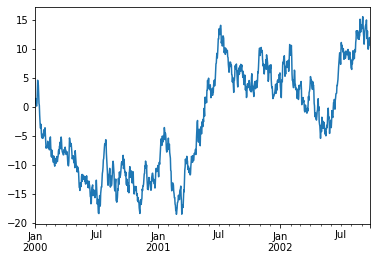

In [198]:
ts.plot()

In [199]:
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2002-09-17', '2002-09-18', '2002-09-19', '2002-09-20',
               '2002-09-21', '2002-09-22', '2002-09-23', '2002-09-24',
               '2002-09-25', '2002-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')

데이터프레임에서 plot() 메소드는 라벨이 존재하는 모든 열을 그릴 때 편리합니다.

In [200]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [201]:
df = df.cumsum()

In [202]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<AxesSubplot:>

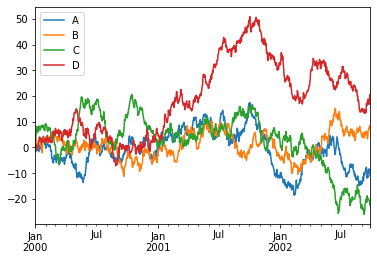

In [203]:
df.plot()

No handles with labels found to put in legend.


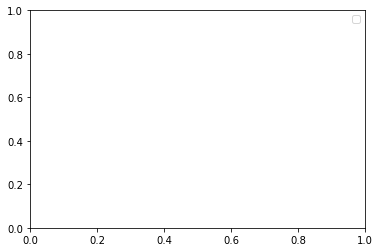

In [204]:
plt.legend(loc="best")

# Getting data in/out (데이터 입 / 출력)

## CSV

csv 파일에 씁니다.

In [205]:
df.to_csv("foo.csv")

csv 파일을 읽습니다.

In [206]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.745937,2.637687,2.681997,-0.699763
1,2000-01-02,-1.651460,2.049342,2.751361,1.179166
2,2000-01-03,-0.175014,2.988898,5.114113,0.987137
3,2000-01-04,-0.353241,1.525584,5.883866,0.507081
4,2000-01-05,0.136571,-0.226879,7.344657,0.312612
...,...,...,...,...,...
995,2002-09-22,-8.371065,7.238288,-20.464260,18.453383
996,2002-09-23,-8.385332,7.970134,-20.622009,16.756799
997,2002-09-24,-9.190227,7.947112,-20.833475,18.902552
998,2002-09-25,-9.231873,8.419687,-22.100449,20.568627


## HDF5

In [207]:
df.to_hdf("foo.h5", "df")

In [208]:
pd.read_hdf("foo.h5", "df")

,A,B,C,D
2000-01-01,0.745937,2.637687,2.681997,-0.699763
2000-01-02,-1.651460,2.049342,2.751361,1.179166
2000-01-03,-0.175014,2.988898,5.114113,0.987137
2000-01-04,-0.353241,1.525584,5.883866,0.507081
2000-01-05,0.136571,-0.226879,7.344657,0.312612
...,...,...,...,...
2002-09-22,-8.371065,7.238288,-20.464260,18.453383
2002-09-23,-8.385332,7.970134,-20.622009,16.756799
2002-09-24,-9.190227,7.947112,-20.833475,18.902552
2002-09-25,-9.231873,8.419687,-22.100449,20.568627


## Excel

In [209]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [210]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,0.745937,2.637687,2.681997,-0.699763
1,2000-01-02,-1.651460,2.049342,2.751361,1.179166
2,2000-01-03,-0.175014,2.988898,5.114113,0.987137
3,2000-01-04,-0.353241,1.525584,5.883866,0.507081
4,2000-01-05,0.136571,-0.226879,7.344657,0.312612
...,...,...,...,...,...
995,2002-09-22,-8.371065,7.238288,-20.464260,18.453383
996,2002-09-23,-8.385332,7.970134,-20.622009,16.756799
997,2002-09-24,-9.190227,7.947112,-20.833475,18.902552
998,2002-09-25,-9.231873,8.419687,-22.100449,20.568627


# Gotchas

연산 수행 시 다음과 같은 예외 상황을 볼 수도 있습니다.

In [211]:
if pd.Series([False, True, False]):
    print("I was true")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

이러한 경우에는 any(), all(), empty 등을 사용해서 무엇을 원하는지를 선택 (반영)해주어야 합니다.

In [ ]:
if pd.Series([False, True, False]) is not None:
    print("I was not None")